In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [27]:
cust_data = pd.read_excel('D:/Data-Analysis/Bank Loan/93fe009c-2-Foreclosure-Prediction-Dataset_/Customers_31JAN2019.xlsx')
cust_data.head()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,12001000,1,5,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
1,12001001,1,5,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.982915,10.0,242703.982915,400070.0
2,12001002,1,7,NaN,50.0,M,M,GRAD,0.0,NaN,NaN,0.000000,NaN,0.000000,400070.0
3,12001003,3,4,NaN,40.0,M,M,GRAD,0.0,NaN,NaN,365263.511624,NaN,365263.516128,400070.0
4,12001004,3,4,NaN,27.0,M,M,GRAD,0.0,NaN,NaN,187342.198995,NaN,187342.198995,400070.0


In [28]:
cust_data.describe()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,NO_OF_DEPENDENT,OCCUPATION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
count,1.000000e+04,10000.000000,10000.000000,0.0,9604.000000,9921.000000,0.0,1.000000e+04,2375.000000,1.000000e+04,9927.000000
mean,1.200778e+07,1.103600,4.495000,NaN,40.844648,0.519202,NaN,1.544479e+05,4.554526,1.536376e+05,469059.826030
std,3.842990e+03,0.526018,0.829605,NaN,9.344151,1.097127,NaN,5.801275e+05,6.254120,5.797531e+05,148742.720744
min,1.200100e+07,1.000000,4.000000,NaN,18.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.200464e+07,1.000000,4.000000,NaN,34.000000,0.000000,NaN,4.503887e+04,0.000000,4.503887e+04,400070.000000
50%,1.200787e+07,1.000000,4.000000,NaN,40.000000,0.000000,NaN,7.506479e+04,2.000000,7.506479e+04,500034.000000
75%,1.201094e+07,1.000000,5.000000,NaN,48.000000,0.000000,NaN,1.288645e+05,7.000000,1.285860e+05,602001.000000
max,1.203390e+07,6.000000,8.000000,NaN,76.000000,10.000000,NaN,2.691744e+07,42.000000,2.691744e+07,641601.000000


In [29]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
CUSTOMERID           10000 non-null int64
CUST_CONSTTYPE_ID    10000 non-null int64
CUST_CATEGORYID      10000 non-null int64
PROFESSION           0 non-null float64
AGE                  9604 non-null float64
SEX                  9606 non-null object
MARITAL_STATUS       9604 non-null object
QUALIFICATION        9397 non-null object
NO_OF_DEPENDENT      9921 non-null float64
OCCUPATION           0 non-null float64
POSITION             661 non-null object
GROSS_INCOME         10000 non-null float64
PRE_JOBYEARS         2375 non-null float64
NETTAKEHOMEINCOME    10000 non-null float64
BRANCH_PINCODE       9927 non-null float64
dtypes: float64(8), int64(3), object(4)
memory usage: 1.1+ MB


In [30]:
cust_data.drop(columns=['PROFESSION', 'OCCUPATION', 'POSITION', 'PRE_JOBYEARS', 'BRANCH_PINCODE', 'SEX', 'CUSTOMERID', 'MARITAL_STATUS'], axis=1, inplace=True)

In [31]:
cust_data.head()

,CUST_CONSTTYPE_ID,CUST_CATEGORYID,AGE,QUALIFICATION,NO_OF_DEPENDENT,GROSS_INCOME,NETTAKEHOMEINCOME
0,1,5,33.0,POSTGRAD,0.0,198375.221829,198375.221829
1,1,5,44.0,POSTGRAD,0.0,242703.982915,242703.982915
2,1,7,50.0,GRAD,0.0,0.000000,0.000000
3,3,4,40.0,GRAD,0.0,365263.511624,365263.516128
4,3,4,27.0,GRAD,0.0,187342.198995,187342.198995


In [32]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
CUST_CONSTTYPE_ID    10000 non-null int64
CUST_CATEGORYID      10000 non-null int64
AGE                  9604 non-null float64
QUALIFICATION        9397 non-null object
NO_OF_DEPENDENT      9921 non-null float64
GROSS_INCOME         10000 non-null float64
NETTAKEHOMEINCOME    10000 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 547.0+ KB


In [33]:
cust_data['NO_OF_DEPENDENT'].fillna(cust_data['NO_OF_DEPENDENT'].mean(), inplace=True)

In [34]:
nod = cust_data['NO_OF_DEPENDENT'].isnull()

In [35]:
print(all(nod)==False)

True


In [36]:
no_dep = np.array(cust_data['NO_OF_DEPENDENT'])
for i in range(len(no_dep)):
    no_dep[i]=math.ceil(no_dep[i])
    
cust_data['NO_OF_DEPENDENT'] = no_dep
#cust_data['NO_OF_DEPENDENT']

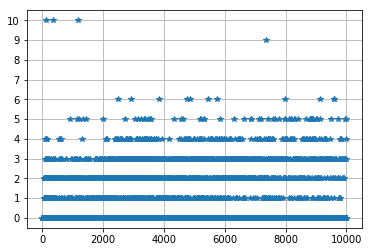

In [37]:
plt.plot(cust_data['NO_OF_DEPENDENT'], '*')
plt.yticks(np.arange(0, 11, step=1))
plt.grid()

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
cust_data['QUALIFICATION'].fillna('null', inplace=True)

In [44]:
le.fit(cust_data['QUALIFICATION'])

LabelEncoder()

In [45]:
le.classes_

array(['DOCTRATE', 'ENG', 'GRAD', 'MAT', 'OTHERS', 'POSTGRAD', 'PRF',
       'UG', 'null'], dtype=object)

In [48]:
cust_data['QUALIFICATION'] = le.transform(cust_data['QUALIFICATION'])

In [50]:
cust_data['AGE'].fillna(cust_data['AGE'].mean(), inplace=True)

In [52]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
CUST_CONSTTYPE_ID    10000 non-null int64
CUST_CATEGORYID      10000 non-null int64
AGE                  10000 non-null float64
QUALIFICATION        10000 non-null int64
NO_OF_DEPENDENT      10000 non-null float64
GROSS_INCOME         10000 non-null float64
NETTAKEHOMEINCOME    10000 non-null float64
dtypes: float64(4), int64(3)
memory usage: 547.0 KB


In [54]:
cust_data.head()

,CUST_CONSTTYPE_ID,CUST_CATEGORYID,AGE,QUALIFICATION,NO_OF_DEPENDENT,GROSS_INCOME,NETTAKEHOMEINCOME
0,1,5,33.0,5,0.0,198375.221829,198375.221829
1,1,5,44.0,5,0.0,242703.982915,242703.982915
2,1,7,50.0,2,0.0,0.000000,0.000000
3,3,4,40.0,2,0.0,365263.511624,365263.516128
4,3,4,27.0,2,0.0,187342.198995,187342.198995


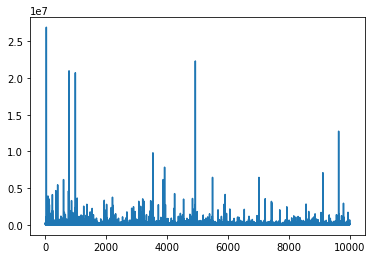

In [55]:
plt.plot(cust_data['NETTAKEHOMEINCOME'])